Trial Data Bangkit Academy

In [1]:
#import dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url = 'https://raw.githubusercontent.com/mmhdagungg/capstone-bangkit-2024/refs/heads/main/dataset_pemasukan_pengeluaran_2023.csv'
df = pd.read_csv(url)
print(df.head())

      Tanggal  Pemasukan  Pengeluaran  Uang Tersedia Keterangan
0  2023-01-01     149679        98608          51071      Bonus
1  2023-01-01      77668        37506          91233  Investasi
2  2023-01-01     116865        41625         166473    Hiburan
3  2023-01-01        903        25707         141669       Gaji
4  2023-01-01     145735       148789         138615  Investasi


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Tanggal        100000 non-null  object
 1   Pemasukan      100000 non-null  int64 
 2   Pengeluaran    100000 non-null  int64 
 3   Uang Tersedia  100000 non-null  int64 
 4   Keterangan     100000 non-null  object
dtypes: int64(3), object(2)
memory usage: 3.8+ MB


In [4]:
df.describe()

,Pemasukan,Pengeluaran,Uang Tersedia
count,100000.000000,100000.00000,1.000000e+05
mean,100027.997720,75154.01473,1.229700e+09
std,57608.667578,43205.01457,7.261689e+08
min,3.000000,8.00000,3.457800e+04
25%,50260.000000,37878.75000,5.908395e+08
50%,99980.000000,75244.00000,1.223426e+09
75%,149924.000000,112337.25000,1.868056e+09
max,199993.000000,149999.00000,2.487398e+09


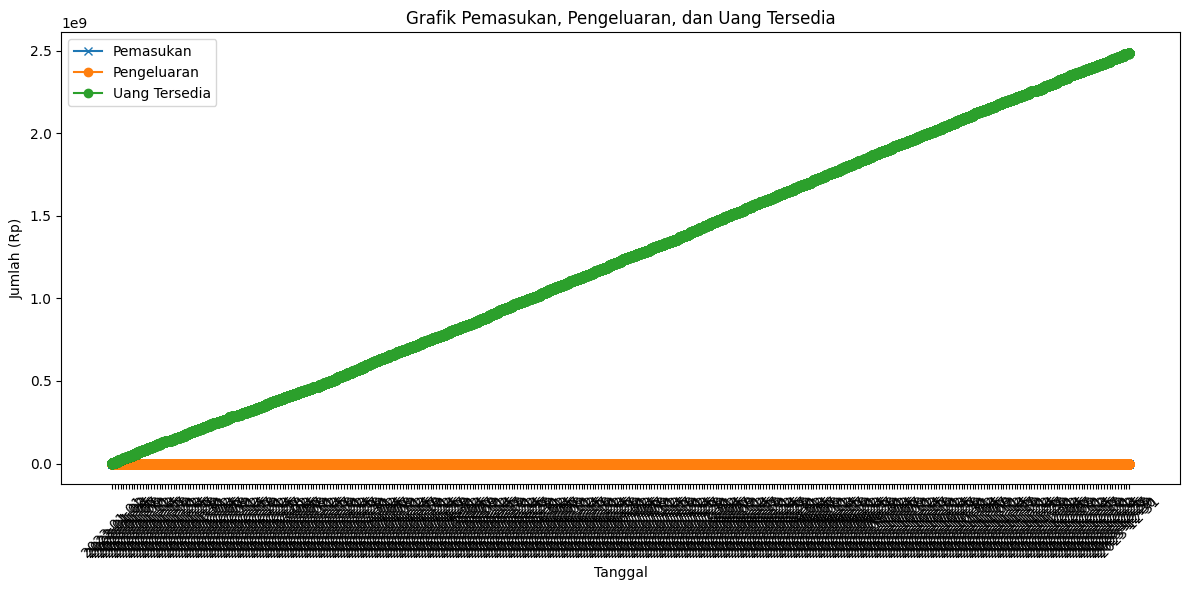

In [5]:
plt.figure(figsize=(12, 6))

# Plot untuk pemasukan, pengeluaran, dan uang tersedia
plt.plot(df['Tanggal'], df['Pemasukan'], label='Pemasukan', marker='x')
plt.plot(df['Tanggal'], df['Pengeluaran'], label='Pengeluaran', marker='o')
plt.plot(df['Tanggal'], df['Uang Tersedia'], label='Uang Tersedia', marker='o')

# Menambahkan label dan judul
plt.xlabel('Tanggal')
plt.ylabel('Jumlah (Rp)')
plt.title('Grafik Pemasukan, Pengeluaran, dan Uang Tersedia')

# Menambahkan legend
plt.legend()

# Menampilkan grafik
plt.xticks(rotation=45)  # Agar label tanggal lebih mudah dibaca
plt.tight_layout()  # Agar grafik tidak terpotong
plt.show()


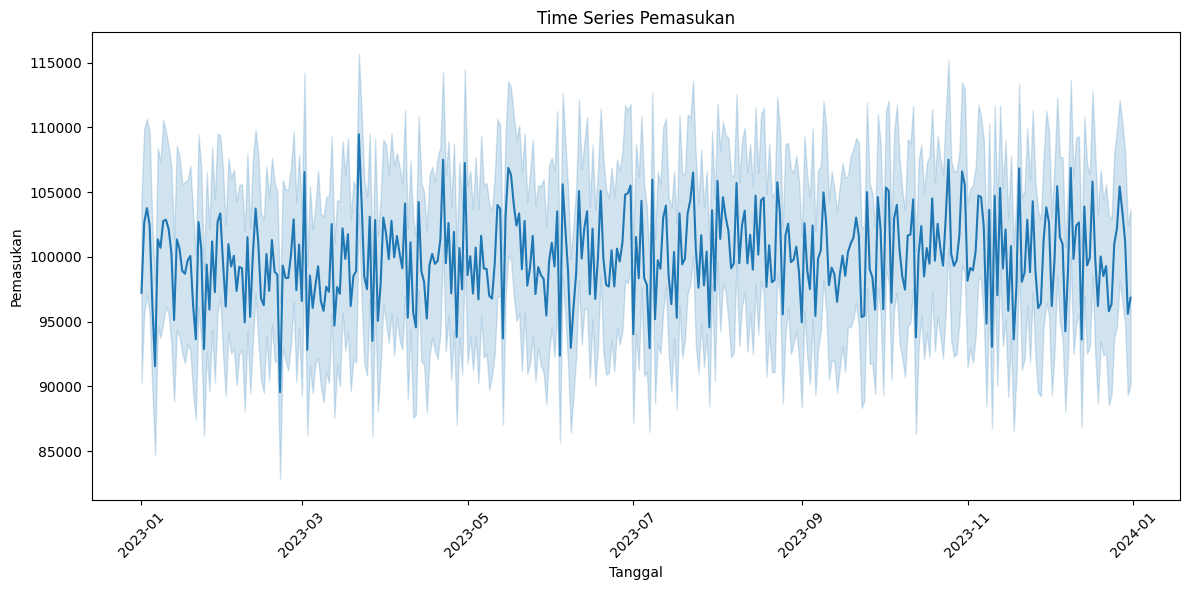

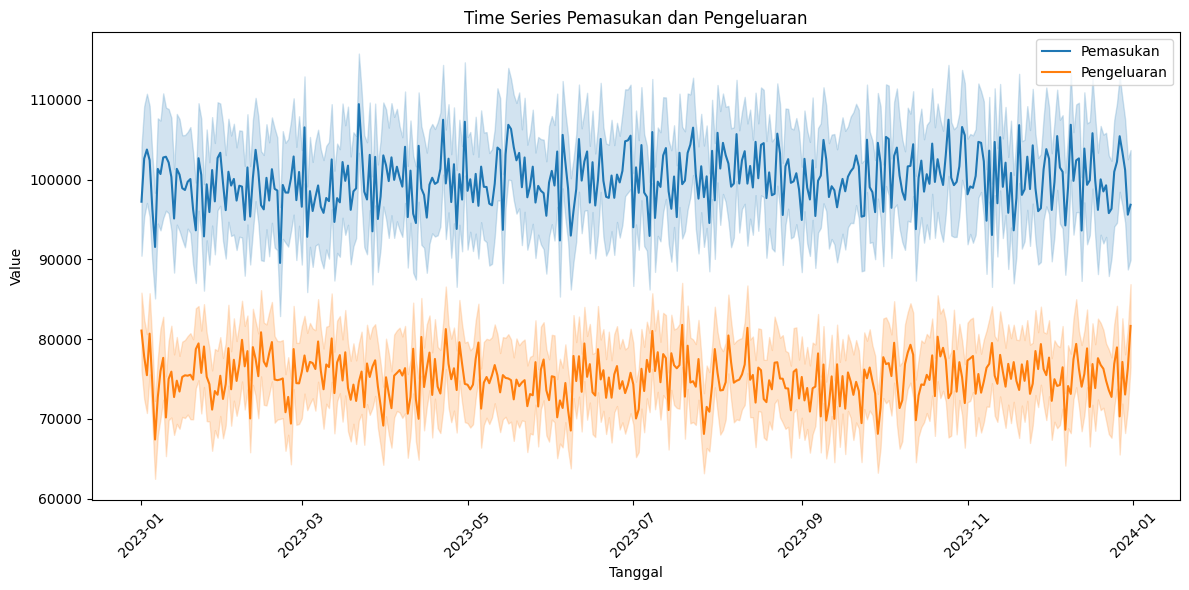

In [6]:
# convert data tanggal ke datetime
df['Tanggal'] = pd.to_datetime(df['Tanggal'])

# Set 'Tanggal' sebagai index
df1 = df.set_index('Tanggal')

plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x=df1.index, y='Pemasukan')
plt.title('Time Series Pemasukan')
plt.xlabel('Tanggal')
plt.ylabel('Pemasukan')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 6))
sns.lineplot(data=df1, x=df1.index, y='Pemasukan', label='Pemasukan')  
sns.lineplot(data=df1, x=df1.index, y='Pengeluaran', label='Pengeluaran')
plt.title('Time Series Pemasukan dan Pengeluaran')
plt.xlabel('Tanggal')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

In [7]:
#mencoba build time series forecasting LSTM
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from datetime import datetime

df.sort_values('Tanggal', inplace=True)

# Select "Uang Tersedia" for time series forecasting
uang_tersedia = df[['Uang Tersedia']].values

# Menormalisasikan uang tersedia
scaler = MinMaxScaler()
uang_tersedia_normalized = scaler.fit_transform(uang_tersedia)

# pilih ukuran windows
WINDOW_SIZE = 30

# membuat sliding windows
def create_sequences(data, window_size):
    sequences = []
    labels = []
    for i in range(len(data) - window_size):
        sequences.append(data[i:i + window_size])
        labels.append(data[i + window_size])
    return np.array(sequences), np.array(labels)

X, y = create_sequences(uang_tersedia_normalized, WINDOW_SIZE)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=False)

# Membuat model lstm (coba coba)
model = tf.keras.models.Sequential([
    tf.keras.layers.LSTM(50, activation='relu', input_shape=(WINDOW_SIZE, 1)),
    tf.keras.layers.Dense(1)
])

# Compile model
model.compile(optimizer='adam', loss='mse')

# Training model
history = model.fit(X_train, y_train, epochs=10, batch_size=32, validation_data=(X_test, y_test))

# Evaluate the model
test_loss = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)

#membuat prediksi dengan model
predictions = model.predict(X_test)
predicted_values = scaler.inverse_transform(predictions)

c:\Users\pc\Downloads\BANGKIT\capstone-bangkit-2024\.venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 0.0033 - val_loss: 2.3934e-05
Epoch 2/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 7.6374e-07 - val_loss: 4.7417e-05
Epoch 3/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 22s 9ms/step - loss: 1.6551e-06 - val_loss: 2.9101e-06
Epoch 4/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 1.6791e-06 - val_loss: 3.4404e-06
Epoch 5/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 1.6104e-06 - val_loss: 2.5102e-06
Epoch 6/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 23s 9ms/step - loss: 1.6001e-06 - val_loss: 6.5465e-06
Epoch 7/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 24s 9ms/step - loss: 9.4580e-07 - val_loss: 1.3719e-05
Epoch 8/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 26s 10ms/step - loss: 1.2953e-06 - val_loss: 4.8815e-06
Epoch 9/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 42s 11ms/step - loss: 1.0649e-06 - val_loss: 5.1154e-07
Epoch 10/10
2500/2500 ━━━━━━━━━━━━━━━━━━━━ 31s 12ms/step - loss: 9.1782e-07 - val_loss: 1.6140e-06
625/625 ━━━━━━━━━━━━━━━━━━━━ 2

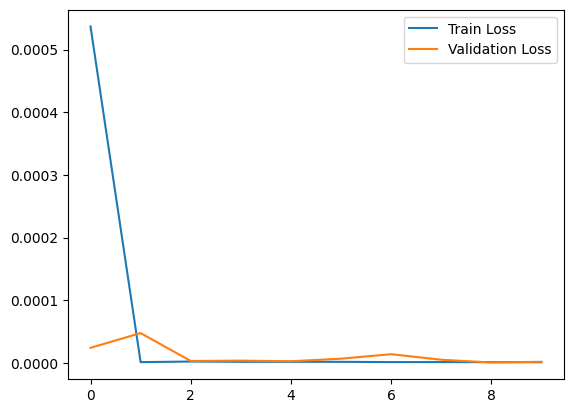

In [8]:
# visualisasi
import matplotlib.pyplot as plt

plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.show()